#### Importing required Libraries

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data=pd.read_csv('fake_news_test.csv')

In [3]:
data.tail()

,ID,text,title,our rating
607,206921579192720402152220292846254137866,DISTRIBUTE TO EVERYONE who does not want to be...,"‘From October 20, the Covid pass and vaccinati...",false
608,26464356958085668535128110139955868781,The physician who served as Bill Gates’ privat...,Bill Gates' Former Doctor Says He 'Refused To ...,Other
609,189700315351432315169761694613833047445,"A customer leaves an SAQ outlet on Jan. 6, the...",Quebec’s expansion of COVID-19 vaccine passpor...,True
610,188373492569049166266633359075598402208,Vaccine coercion activists are using the fake ...,ALERT: Luc Montagnier Did NOT Say Vaccine Woul...,false
611,337277576050638215330059360481185892501,Placeholder while article actions load Quebec...,"Quebec’s cannabis, liquor stores to require co...",True


In [4]:
data=data.iloc[:,1:4]

In [5]:
data.head()

,text,title,our rating
0,The deputy secretary at the US Treasury has sa...,US Treasury deputy sec warns that shortages li...,Partially false
1,KABUL—Approximately twelve minutes after U.S. ...,CNN Praises Taliban For Wearing Masks During A...,Other
2,The vast majority of (oblivious) Americans hav...,Tennessee Has Just LEGALIZED Government COVID ...,false
3,(Natural News) There’s a secret layer of infor...,MEDICAL SHOCKER: Scientists at Sloan Kettering...,false
4,"A recent study reported by the NCBI, which is ...",Study Results: Facemasks are Ineffective to Bl...,false


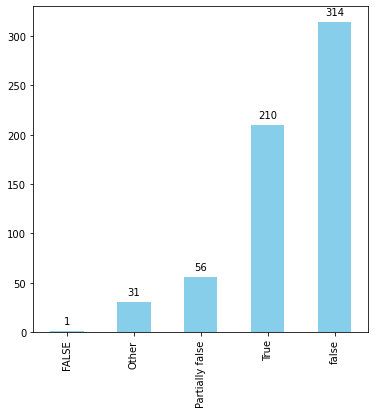

In [6]:
plt.subplots(figsize=(6, 6))
ax=data['our rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

There are 576 False categories, 351 partially false, 210 true and 116 other categories in our dataset.

In [7]:
data.isna().sum()

text          0
title         0
our rating    0
dtype: int64

In [8]:
data['title'].fillna('Unknown', inplace=True)

In [9]:
data.isna().sum()

text          0
title         0
our rating    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

Null values and duplicates handled

## Separating dependent and independent features

In [13]:
X=data.drop('our rating', axis=1)

In [14]:
X.head()

,text,title
0,The deputy secretary at the US Treasury has sa...,US Treasury deputy sec warns that shortages li...
1,KABUL—Approximately twelve minutes after U.S. ...,CNN Praises Taliban For Wearing Masks During A...
2,The vast majority of (oblivious) Americans hav...,Tennessee Has Just LEGALIZED Government COVID ...
3,(Natural News) There’s a secret layer of infor...,MEDICAL SHOCKER: Scientists at Sloan Kettering...
4,"A recent study reported by the NCBI, which is ...",Study Results: Facemasks are Ineffective to Bl...


### Text pre-processing

In [15]:
msgs=data.copy()
msgs.reset_index(inplace=True)

In [16]:
msgs.sample(5)

,index,text,title,our rating
211,211,WeLoveTrump.com may receive compensation from ...,CDC Admits: More Dead from COVID-19 Vaccine Th...,false
611,611,Placeholder while article actions load Quebec...,"Quebec’s cannabis, liquor stores to require co...",True
244,244,Vaccines work. They have played a critical rol...,Transparency and data – UKHSA’s vaccines report,True
527,527,Barr’s comments came after The New York Times ...,Barr distances himself from Trump-era subpoena...,True
85,85,While watching reports from the Alba Party wom...,Wings Over Scotland,false


###### stop words removal and lemmatization

In [17]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(0, len(msgs)):
    review=re.sub('[^a-zA-Z]',' ', msgs['title'][i])
    review=review.lower().split()
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [18]:
corpus[27]

'rain fell normally snowy summit greenland first time record'

##### Vectorizing the text using TFIDF

In [19]:
cv=CountVectorizer(max_features=25000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [20]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
X.shape

(612, 9102)

In [22]:
le=LabelEncoder()
data['our rating']=le.fit_transform(data['our rating'])

In [23]:
data.sample(10)

,text,title,our rating
255,DANIEL LEAL-OLIVAS via Getty Images Oliver Do...,Tory Chairman Refuses To Rule Out Early Genera...,3
164,UPDATE: CLINTON HANGED AT GITMO A military tr...,Clinton Military Tribunal: Day 5 CONVICTION!,4
92,Blue Origin's New Shepard rocket latest space ...,"William Shatner, TV’s Capt. Kirk, blasts into ...",4
390,Last month Real Raw News reported on a shockin...,Pentagon Coup! Joint Chiefs Overthrown,4
139,A preprint paper by the prestigious Oxford Uni...,Study: Fully Vaccinated Healthcare Workers Car...,4
357,Comedian and podcaster Joe Rogan lost his $100...,Joe Rogan Loses Spotify Deal And Millions Due ...,4
384,Traitor. Murderer. Pedophile. Luciferian. Clin...,John Podesta Executed at GITMO,4
10,"On Saturday, September 11, 43-year-old Dale Ol...","Census Data, CDC Database Expose Unvaccinated",0
217,Washington (CNN) A large gun-rights rally in V...,Virginia gun-rights rally concludes peacefully...,3
381,The psychopath John Brennan is no more. On Mo...,John Brennan Hanged at GITMO,4


In [24]:
data['our rating'].unique()

array([2, 1, 4, 0, 3])

0-False, 3-partially false, 2-True, 1-other

In [25]:
y=data['our rating']

In [26]:
cv.get_feature_names()[:20]

C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandoned',
 'abandoned false',
 'abandoned false hiv',
 'abandoned kabul',
 'abandoned kabul airport',
 'abc',
 'abc nbc',
 'abc nbc cbs',
 'abedin',
 'abilene',
 'abilene tx',
 'abinader',
 'abolished',
 'abolished entire',
 'abolished entire territory',
 'abortion',
 'abortion ban',
 'abortion ban pass',
 'abortion birth',
 'abortion law']

In [27]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 25000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [28]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names())
count_df.tail()

,abandoned,abandoned false,abandoned false hiv,abandoned kabul,abandoned kabul airport,abc,abc nbc,abc nbc cbs,abedin,abilene,...,zinc bullet,zinc bullet kill,zinke,zinke interior,zinke interior secretary,zinke special,zinke special flag,zone,zone concentration,zone concentration camp
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train-Test Split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

### Applying the Models

#### 1. MulinomialNB Algorithm

In [30]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.4878048780487805

In [32]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  1],
       [ 0,  2,  1,  1,  2],
       [ 0,  5,  7,  2,  2],
       [ 0,  5,  7, 20,  3],
       [ 0, 16, 10,  8, 31]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.07      0.33      0.12         6
           2       0.28      0.44      0.34        16
           3       0.65      0.57      0.61        35
           4       0.79      0.48      0.60        65

    accuracy                           0.49       123
   macro avg       0.36      0.36      0.33       123
weighted avg       0.64      0.49      0.54       123



C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
classifier=PassiveAggressiveClassifier(max_iter=5000,C=0.5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred)

0.6341463414634146

In [36]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  4,  2],
       [ 0,  0,  2,  6,  8],
       [ 0,  0,  1, 29,  5],
       [ 0,  0,  0, 18, 47]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.67      0.12      0.21        16
           3       0.51      0.83      0.63        35
           4       0.75      0.72      0.73        65

    accuracy                           0.63       123
   macro avg       0.38      0.34      0.32       123
weighted avg       0.63      0.63      0.59       123



C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Hyper-parameter tuning

In [38]:
classifier=MultinomialNB(alpha=0.1)

In [43]:
prev_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred=sub_classifier.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score>prev_score:
        classifier=sub_classifier
    print("Alpha:{}, Score:{}".format(alpha,score))

C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha:0.0, Score:0.5447154471544715
Alpha:0.1, Score:0.3008130081300813
Alpha:0.2, Score:0.3252032520325203
Alpha:0.30000000000000004, Score:0.34959349593495936
Alpha:0.4, Score:0.3821138211382114
Alpha:0.5, Score:0.4065040650406504
Alpha:0.6000000000000001, Score:0.4065040650406504
Alpha:0.7000000000000001, Score:0.4146341463414634
Alpha:0.8, Score:0.42276422764227645
Alpha:0.9, Score:0.4634146341463415


In [57]:
prev_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=PassiveAggressiveClassifier(C=alpha, max_iter=5000,shuffle=False )
    sub_classifier.fit(X_train, y_train)
    y_pred=sub_classifier.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score>prev_score:
        classifier=sub_classifier
    print("Alpha:{}, Score:{}".format(alpha,score))

Alpha:0.0, Score:0.04878048780487805
Alpha:0.1, Score:0.6260162601626016
Alpha:0.2, Score:0.6341463414634146
Alpha:0.30000000000000004, Score:0.6260162601626016
Alpha:0.4, Score:0.6178861788617886
Alpha:0.5, Score:0.6178861788617886
Alpha:0.6000000000000001, Score:0.6178861788617886
Alpha:0.7000000000000001, Score:0.6178861788617886
Alpha:0.8, Score:0.6178861788617886
Alpha:0.9, Score:0.6178861788617886


In [68]:
classifier=PassiveAggressiveClassifier(max_iter=5000,C=0.3)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.6341463414634146

In [70]:
feature_names=cv.get_feature_names()

C:\Users\Aditi\python_softwares\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
classifier.coef_[0]

array([-0.03788933, -0.0271891 , -0.0271891 , ..., -0.01166733,
       -0.01166733, -0.01166733])

#### First 20 MOST REAL WORD

In [73]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-0.2214264195416412, 'vaccine'),
 (-0.15946802793316653, 'vaccinated'),
 (-0.10573710965867829, 'libya'),
 (-0.10362227219449266, 'national'),
 (-0.09952712203432446, 'national qualification'),
 (-0.09952712203432446, 'qualification'),
 (-0.09925115880976632, 'thermodynamics'),
 (-0.09275552057640046, 'luciferase'),
 (-0.09266644781496361, 'pandemic'),
 (-0.08879250164946825, 'pentagon'),
 (-0.08854259687669394, 'care'),
 (-0.08854259687669394, 'care levy'),
 (-0.08854259687669394, 'health social'),
 (-0.08854259687669394, 'health social care'),
 (-0.08854259687669394, 'levy'),
 (-0.08854259687669394, 'social'),
 (-0.08854259687669394, 'social care'),
 (-0.08854259687669394, 'social care levy'),
 (-0.08535905930188449, 'white'),
 (-0.08161374668719124, 'military')]

#### Most Fakest words

In [74]:
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-0.2214264195416412, 'vaccine'),
 (-0.15946802793316653, 'vaccinated'),
 (-0.10573710965867829, 'libya'),
 (-0.10362227219449266, 'national'),
 (-0.09952712203432446, 'national qualification'),
 (-0.09952712203432446, 'qualification'),
 (-0.09925115880976632, 'thermodynamics'),
 (-0.09275552057640046, 'luciferase'),
 (-0.09266644781496361, 'pandemic'),
 (-0.08879250164946825, 'pentagon'),
 (-0.08854259687669394, 'care'),
 (-0.08854259687669394, 'care levy'),
 (-0.08854259687669394, 'health social'),
 (-0.08854259687669394, 'health social care'),
 (-0.08854259687669394, 'levy'),
 (-0.08854259687669394, 'social'),
 (-0.08854259687669394, 'social care'),
 (-0.08854259687669394, 'social care levy'),
 (-0.08535905930188449, 'white'),
 (-0.08161374668719124, 'military')]